In [1]:
from GRLT_analysis.data_loader import data_loader

y = data_loader(file_path="data/conditions_gastrointestinal.csv")
y.download_csv()
y.identify_type()
y.clean_junk()
y.select_year("all")
y.age_death_variable()
y.file

For context, there are 16.0 entries in this dataset per unique dog for the timeframe you have selected


,subject_id__I,year_in_study__Q_x,index,year_in_study__Q_y,relationship_category__C,to_date__C,any__C,acid_reflux__C,acute_colitis__C,bacterial_overgrowth__C,...,megaesophagus__C,motility_disorder__C,motion_sickness__C,nausea_retching_gagging__C,pancreatitis__C,regurgitation__C,toxin_ingestion__C,vomiting__C,other__C,lifespan_days__Q
0,grls007MPNZZ,3.5,0,0,DOG,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT
1,grls00NB23WW,3.5,16,0,DOG,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2070 days
2,grls01C2L8RR,3.5,32,0,DOG,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3011 days
3,grls01LNL888,3.5,48,0,DOG,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaT
4,grls01RDAKNN,3.5,64,0,DOG,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,grlsZW6L5W33,3.5,48624,0,DOG,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT
3040,grlsZY1Z1OSS,3.5,48640,0,DOG,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3103 days
3041,grlsZY5KYKXX,3.5,48656,0,DOG,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2617 days
3042,grlsZYI0K6LL,3.5,48672,0,DOG,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT


In [2]:
df_filtered = y.file[y.file['lifespan_days__Q'].notna()]
df_filtered = df_filtered.loc[:, df_filtered.nunique() > 1]

life_lengths = df_filtered['lifespan_days__Q'].dt.days.to_numpy()
life_lengths = life_lengths.astype(float)
print(life_lengths)

[2070. 3011. 2710. ... 3103. 2617. 2953.]


In [3]:
df_filtered = df_filtered.select_dtypes(exclude=['object', 'string'])
data_array = df_filtered.values[:,1:-1]
data_array = data_array.astype(float)

print(data_array)
print(df_filtered.shape)
print(data_array.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]
(1451, 14)
(1451, 12)


X_train shape: (1160, 12) X_val shape: (291, 12)
Added feature 11: val MSE = 724337.52758, improvement = inf (total: [11])
Added feature 7: val MSE = 719455.55766, improvement = 4881.96992 (total: [11, 7])
Added feature 3: val MSE = 713659.91198, improvement = 5795.64568 (total: [11, 7, 3])
Added feature 1: val MSE = 709753.99026, improvement = 3905.92172 (total: [11, 7, 3, 1])
Added feature 8: val MSE = 706697.05402, improvement = 3056.93624 (total: [11, 7, 3, 1, 8])
Reached max_features = 5. Stopping.

Selected Features: [11, 7, 3, 1, 8]
Coefficients: [-258.44648323  -91.74799624  355.5375995   155.08854983  -63.03378211]
Best Intercept: 3561.1841774474124
Best Validation MSE: 706697.0540
Best R-squared: 0.0073


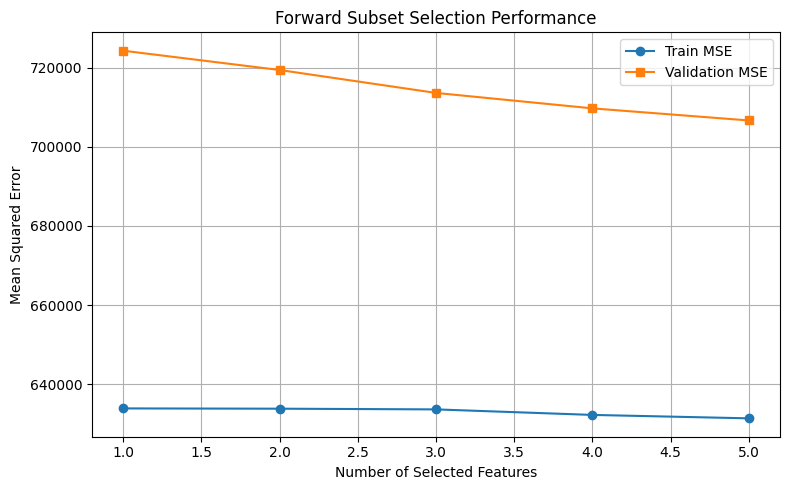

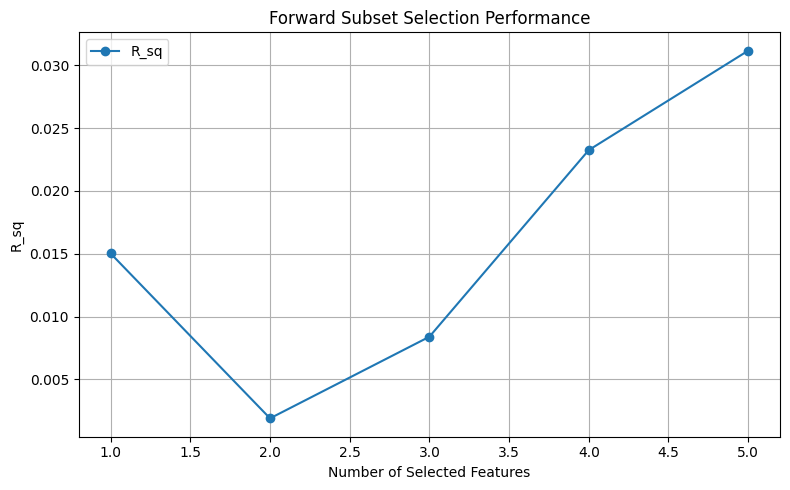

In [4]:
from GRLT_analysis.feature_selection import forward_subset_selection
from GRLT_analysis.feature_selection import lasso_feature_selection

selected_features, theta, preds, mse, r2 = forward_subset_selection(
    data_array, life_lengths, val_ratio=0.2, epsilon=1e-4, max_features=5)

In [5]:
# Lasso selection
lasso_features, coefs, intercept, preds, alpha, val_mse, r_sq = lasso_feature_selection(
    data_array, life_lengths, val_ratio=0.2, alpha_min=1e-4, alpha_max=1.0, n_alphas=20
)

TypeError: cannot unpack non-iterable NoneType object